In [74]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
#sns.set(style="whitegrid", color_codes=True) 


In [75]:
df = pd.read_csv("../bioschemas_validation.csv")
df

Unnamed: 0                         Bioschemas Live Deploy URL  \
0             0                           https://www.ensembl.org/   
1             1                https://workflowhub.eu/workflows/18   
2             2                https://workflowhub.eu/workflows/18   
3             3                https://workflowhub.eu/workflows/18   
4             4                https://workflowhub.eu/workflows/18   
..          ...                                                ...   
106         106                                  https://bgee.org/   
107         107  https://h2020-riskgone.github.io/riskgone-mate...   
108         108  https://www.genenames.org/data/gene-symbol-rep...   
109         109  https://www.genenames.org/data/gene-symbol-rep...   
110         110  https://bgee.org/?page=species&amp;species_id=...   

                                      Evaluated entity  \
0                      http://www.ensembl.org/#project   
1    https://workflowhub.eu/workflows/18#cheminform...   
2    https://workflowhub.eu/workflows/18#cheminform...   
3    https://workflowhub.eu/workflows/18#cheminform...   
4    https://workflowhub.eu/workflows/18#cheminform...   
..                                                 ...   
106                              https://www.bgee.org/   
107  https://nanocommons.github.io/identifiers/regi...   
108  https://www.genenames.org/data/genegroup/#data...   
109            https://www.genenames.org/#data-catalog   
110  https://www.bgee.org/?page=species&amp;species...   

                                     Reference profile  Is valid  Nb errors  \
0    https://bioschemas.org/profiles/DataCatalog/0....     False          1   
1    https://bioschemas.org/profiles/FormalParamete...      True          0   
2    https://bioschemas.org/profiles/FormalParamete...      True          0   
3    https://bioschemas.org/profiles/FormalParamete...      True          0   
4    https://bioschemas.org/profiles/FormalParamete...      True          0   
..                                                 ...       ...        ...   
106  https://bioschemas.org/profiles/Dataset/1.0-RE...     False          1   
107  https://bioschemas.org/profiles/ChemicalSubsta...     False          1   
108  https://bioschemas.org/profiles/Dataset/1.0-RE...     False          1   
109  https://bioschemas.org/profiles/DataCatalog/0....     False          4   
110  https://bioschemas.org/profiles/Dataset/1.0-RE...     False          1   

     Nb warnings Is the latest profile  Is deprecated profile  
0              6                  True                  False  
1              3                  True                  False  
2              3                  True                  False  
3              3                  True                  False  
4              3                  True                  False  
..           ...                   ...                    ...  
106            7                  True                  False  
107            2                  True                  False  
108            7                  True                  False  
109            8                  True                  False  
110            7                  True                  False  

[111 rows x 9 columns]

In [83]:
df["Reference profile"] = df["Reference profile"].apply(lambda x: x.split("https://bioschemas.org/profiles/")[1])

/var/folders/x1/d1nyvpvs0td0htxzsv9x6ggw0000gn/T/ipykernel_72494/2694667556.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')


[Text(0.5, 1.0, 'Most used profiles in Live Deploys')]

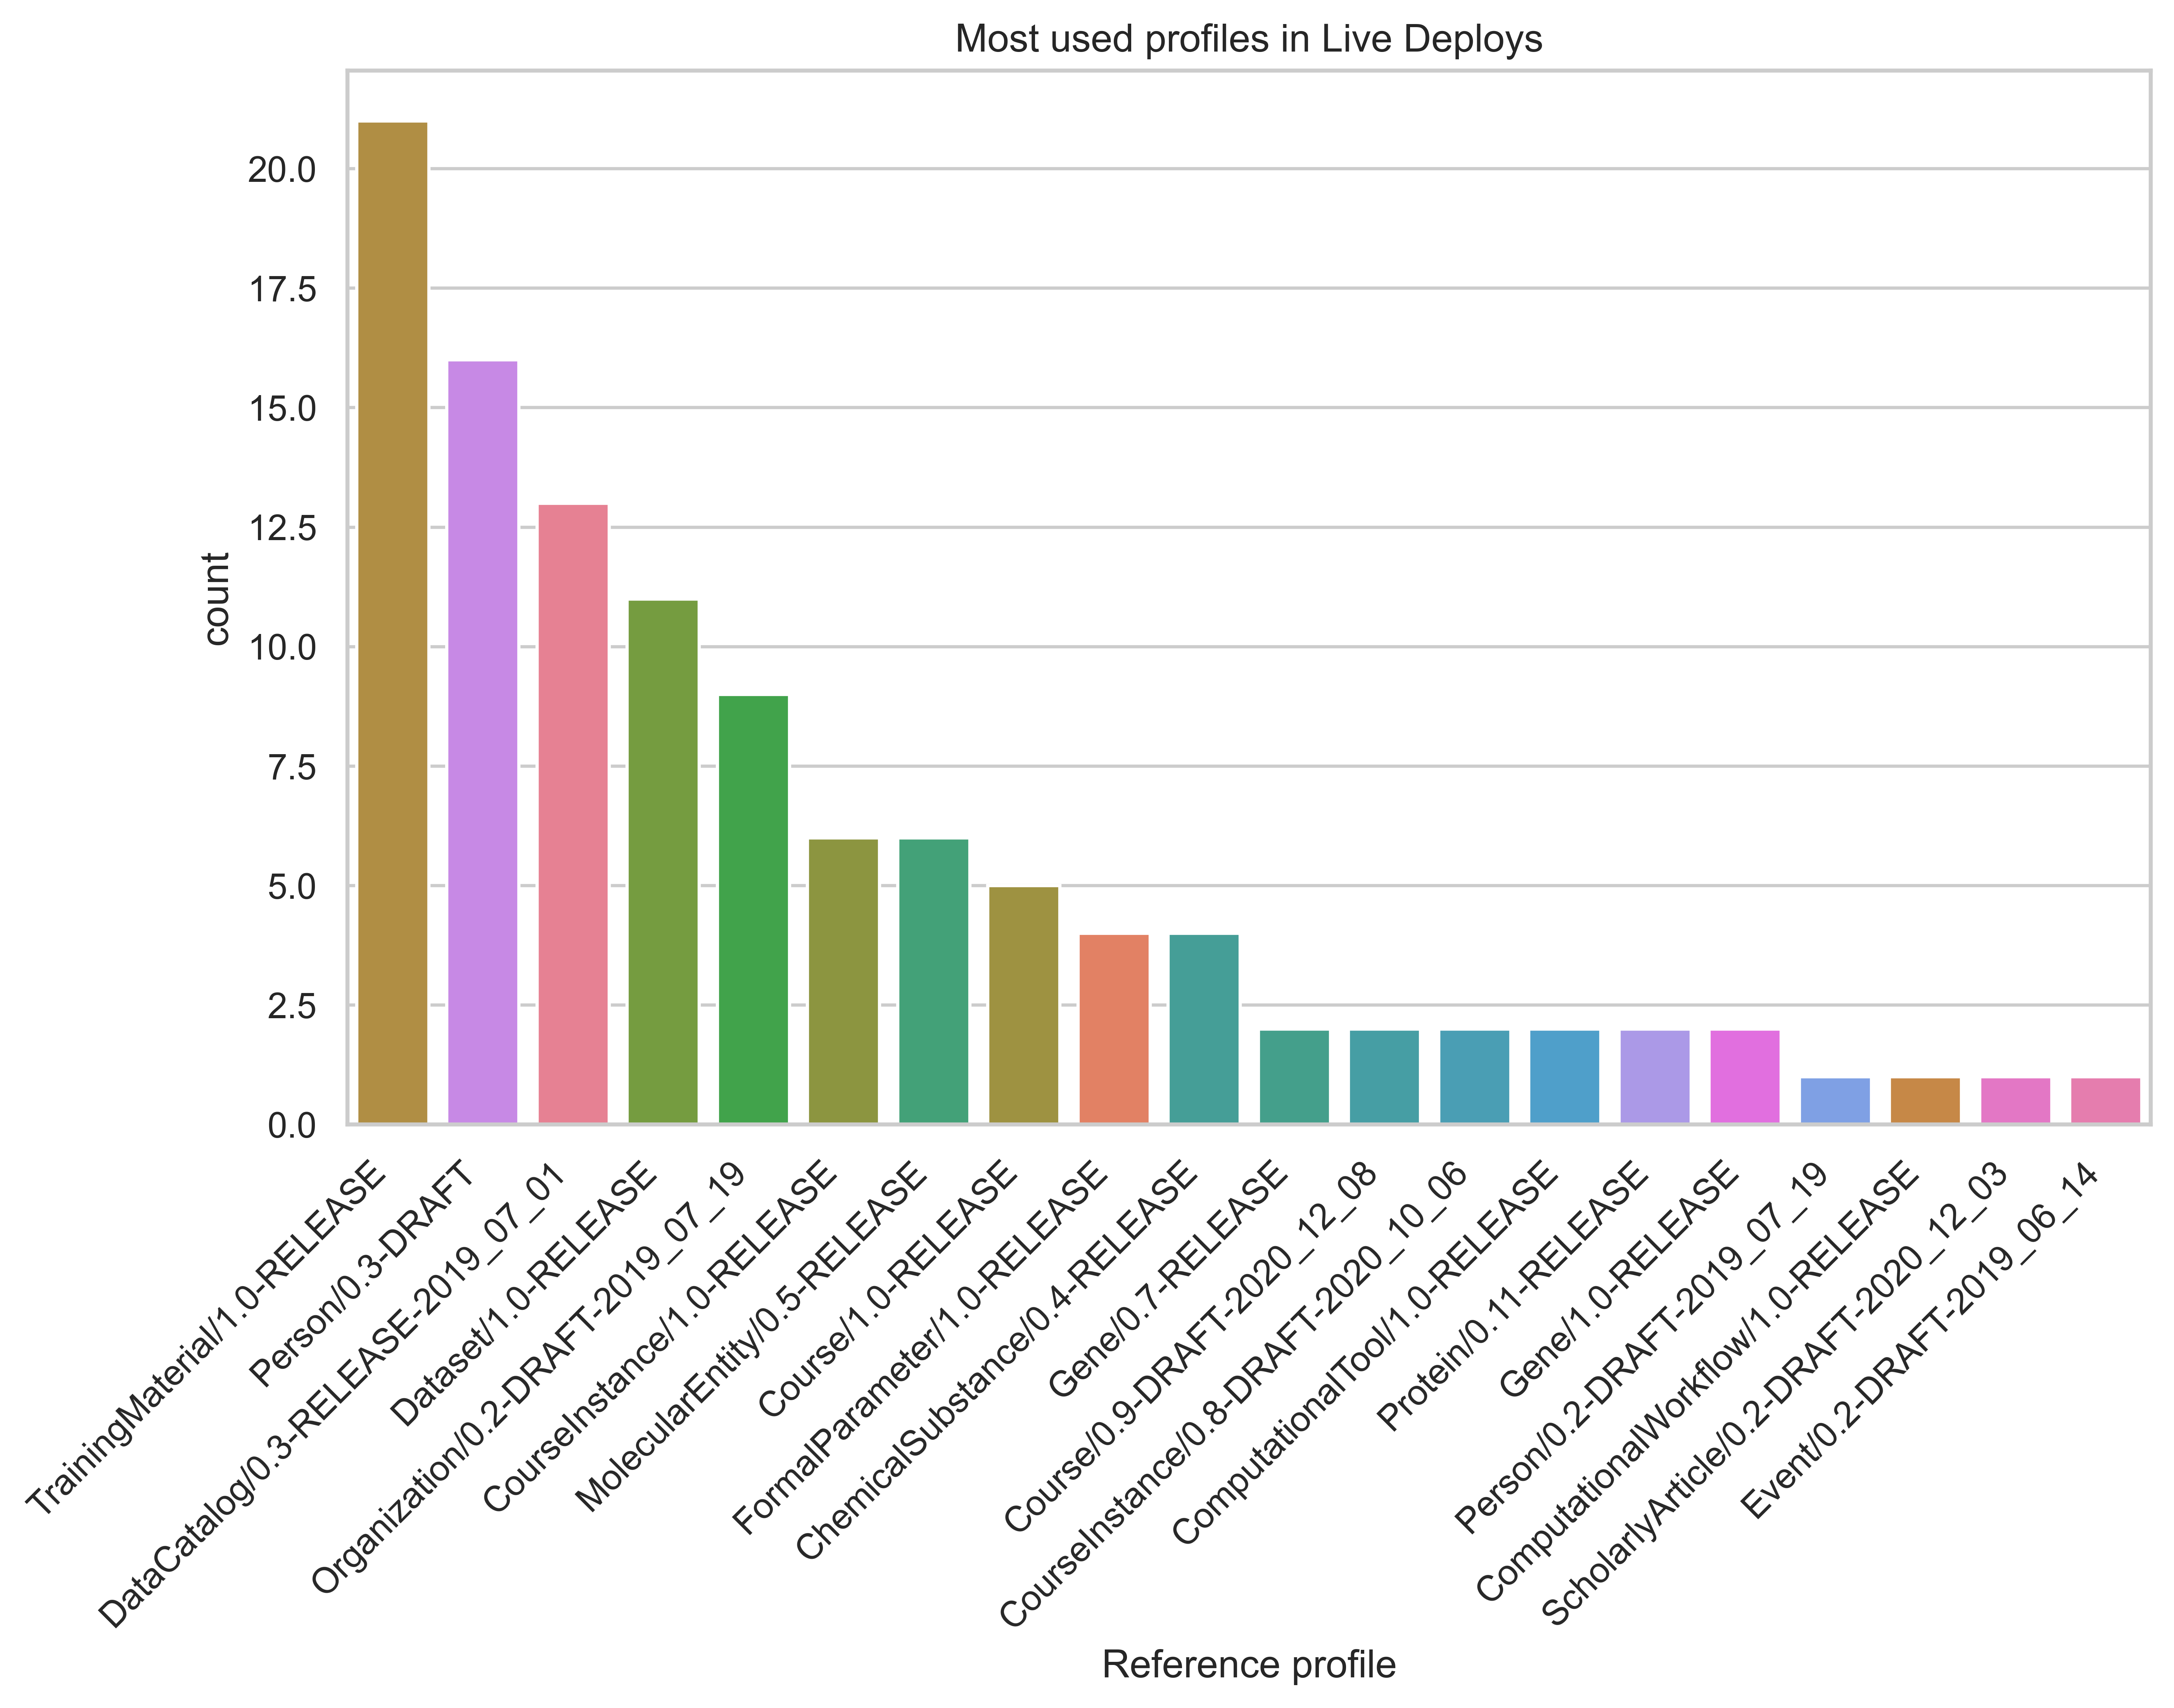

In [84]:
plt.figure(figsize=(10,6), dpi=600) 

g = sns.countplot(df, 
                  x="Reference profile", 
                  hue="Reference profile", 
                  order=df['Reference profile'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set(title='Most used profiles in Live Deploys')

In [87]:
# sns.boxplot(x="Is valid", y="Nb warnings", data=df, log_scale=False)

In [88]:
# sns.boxplot(x="Is valid", y="Nb errors", data=df, log_scale=False)

In [89]:
# df_errors = df.groupby(['Reference profile'])['Nb errors'].count()

In [91]:
# df_errors.sort_values(ascending=False)

In [46]:
# df_warnings = df.groupby(['Reference profile'])['Nb warnings'].count()

In [92]:
# df_warnings.sort_values(ascending=False)

In [105]:
df_agg = ( df.groupby(by=['Reference profile'])
          .agg({'Nb errors':'sum', 'Nb warnings':'sum'})
          .rename(columns={'Nb errors':'Total nb errors', 'Nb warnings':'Total nb improvements'})
          )

df_agg['size'] = df.groupby(['Reference profile']).size().to_frame('size')
df_agg['normalized_nb_errors'] = df_agg["Total nb errors"]/df_agg["size"]
df_agg['normalized_nb_improvements'] = df_agg["Total nb improvements"]/df_agg["size"]

In [106]:
# df_agg.sort_values(by="Total nb errors", ascending=False)

In [107]:
df_agg.sort_values(by="normalized_nb_errors", ascending=False)

Total nb errors  Total nb improvements  \
Reference profile                                                               
Event/0.2-DRAFT-2019_06_14                           3                     10   
Organization/0.2-DRAFT-2019_07_19                   21                     99   
Person/0.2-DRAFT-2019_07_19                          2                      4   
DataCatalog/0.3-RELEASE-2019_07_01                  15                     72   
ComputationalWorkflow/1.0-RELEASE                    1                     12   
Dataset/1.0-RELEASE                                  6                     83   
ChemicalSubstance/0.4-RELEASE                        1                      5   
Gene/1.0-RELEASE                                     0                      7   
ScholarlyArticle/0.2-DRAFT-2020_12_03                0                      8   
Protein/0.11-RELEASE                                 0                      7   
Person/0.3-DRAFT                                     0                     96   
MolecularEntity/0.5-RELEASE                          0                     17   
FormalParameter/1.0-RELEASE                          0                     12   
Gene/0.7-RELEASE                                     0                      4   
ComputationalTool/1.0-RELEASE                        0                      8   
CourseInstance/1.0-RELEASE                           0                      8   
CourseInstance/0.8-DRAFT-2020_10_06                  0                      2   
Course/1.0-RELEASE                                   0                     42   
Course/0.9-DRAFT-2020_12_08                          0                     24   
TrainingMaterial/1.0-RELEASE                         0                    152   

                                       size  normalized_nb_errors  \
Reference profile                                                   
Event/0.2-DRAFT-2019_06_14                1              3.000000   
Organization/0.2-DRAFT-2019_07_19         9              2.333333   
Person/0.2-DRAFT-2019_07_19               1              2.000000   
DataCatalog/0.3-RELEASE-2019_07_01       13              1.153846   
ComputationalWorkflow/1.0-RELEASE         1              1.000000   
Dataset/1.0-RELEASE                      11              0.545455   
ChemicalSubstance/0.4-RELEASE             4              0.250000   
Gene/1.0-RELEASE                          2              0.000000   
ScholarlyArticle/0.2-DRAFT-2020_12_03     1              0.000000   
Protein/0.11-RELEASE                      2              0.000000   
Person/0.3-DRAFT                         16              0.000000   
MolecularEntity/0.5-RELEASE               6              0.000000   
FormalParameter/1.0-RELEASE               4              0.000000   
Gene/0.7-RELEASE                          2              0.000000   
ComputationalTool/1.0-RELEASE             2              0.000000   
CourseInstance/1.0-RELEASE                6              0.000000   
CourseInstance/0.8-DRAFT-2020_10_06       2              0.000000   
Course/1.0-RELEASE                        5              0.000000   
Course/0.9-DRAFT-2020_12_08               2              0.000000   
TrainingMaterial/1.0-RELEASE             21              0.000000   

                                       normalized_nb_improvements  
Reference profile                                                  
Event/0.2-DRAFT-2019_06_14                              10.000000  
Organization/0.2-DRAFT-2019_07_19                       11.000000  
Person/0.2-DRAFT-2019_07_19                              4.000000  
DataCatalog/0.3-RELEASE-2019_07_01                       5.538462  
ComputationalWorkflow/1.0-RELEASE                       12.000000  
Dataset/1.0-RELEASE                                      7.545455  
ChemicalSubstance/0.4-RELEASE                            1.250000  
Gene/1.0-RELEASE                                         3.500000  
ScholarlyArticle/0.2-DRAFT-2020_12_03                    

/var/folders/x1/d1nyvpvs0td0htxzsv9x6ggw0000gn/T/ipykernel_72494/1752995673.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')


[Text(0.5, 1.0, 'Top priority communities needing support')]

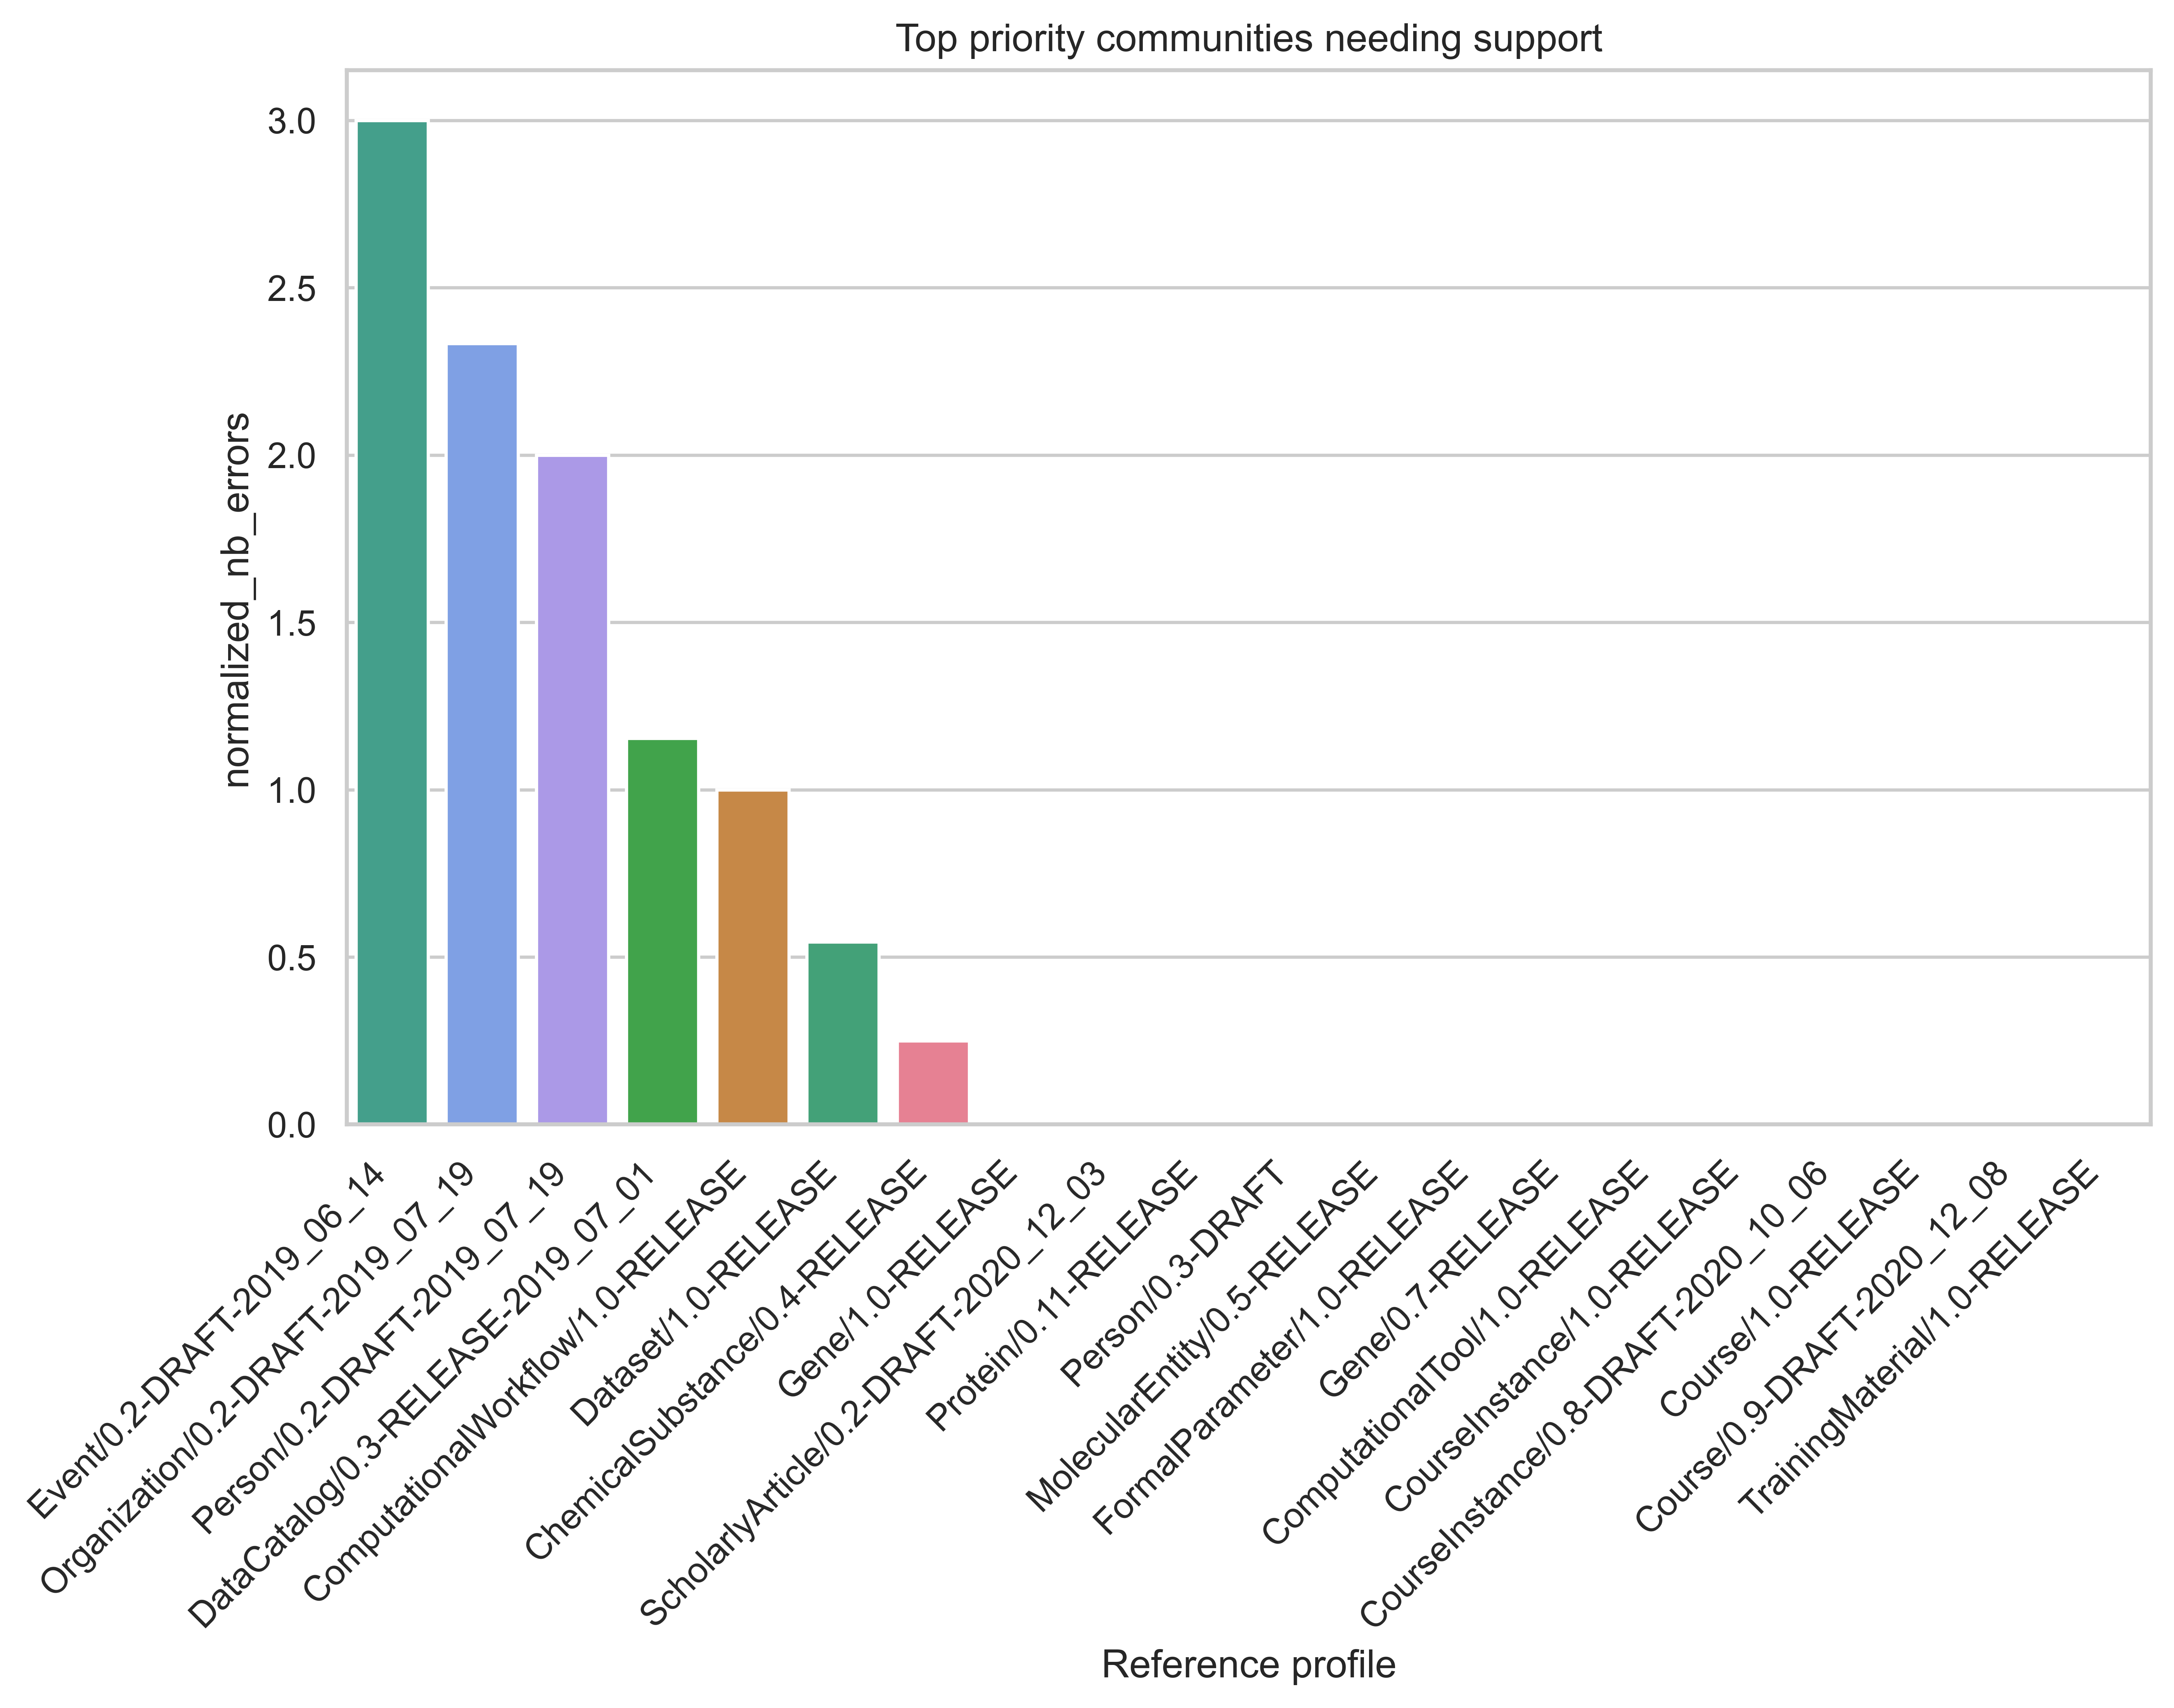

In [108]:
plt.figure(figsize=(10,6), dpi=600) 

g = sns.barplot(df_agg, 
                x="Reference profile", 
                y="normalized_nb_errors", 
                hue="Reference profile",
                order=df_agg.sort_values('normalized_nb_errors', ascending=False).index
               )
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set(title='Top priority communities needing support')

In [101]:
# df_agg.sort_values(by="Total nb warnings", ascending=False)

In [110]:
df_agg.sort_values(by="normalized_nb_improvements", ascending=False)

Total nb errors  Total nb improvements  \
Reference profile                                                               
ComputationalWorkflow/1.0-RELEASE                    1                     12   
Course/0.9-DRAFT-2020_12_08                          0                     24   
Organization/0.2-DRAFT-2019_07_19                   21                     99   
Event/0.2-DRAFT-2019_06_14                           3                     10   
Course/1.0-RELEASE                                   0                     42   
ScholarlyArticle/0.2-DRAFT-2020_12_03                0                      8   
Dataset/1.0-RELEASE                                  6                     83   
TrainingMaterial/1.0-RELEASE                         0                    152   
Person/0.3-DRAFT                                     0                     96   
DataCatalog/0.3-RELEASE-2019_07_01                  15                     72   
ComputationalTool/1.0-RELEASE                        0                      8   
Person/0.2-DRAFT-2019_07_19                          2                      4   
Protein/0.11-RELEASE                                 0                      7   
Gene/1.0-RELEASE                                     0                      7   
FormalParameter/1.0-RELEASE                          0                     12   
MolecularEntity/0.5-RELEASE                          0                     17   
Gene/0.7-RELEASE                                     0                      4   
CourseInstance/1.0-RELEASE                           0                      8   
ChemicalSubstance/0.4-RELEASE                        1                      5   
CourseInstance/0.8-DRAFT-2020_10_06                  0                      2   

                                       size  normalized_nb_errors  \
Reference profile                                                   
ComputationalWorkflow/1.0-RELEASE         1              1.000000   
Course/0.9-DRAFT-2020_12_08               2              0.000000   
Organization/0.2-DRAFT-2019_07_19         9              2.333333   
Event/0.2-DRAFT-2019_06_14                1              3.000000   
Course/1.0-RELEASE                        5              0.000000   
ScholarlyArticle/0.2-DRAFT-2020_12_03     1              0.000000   
Dataset/1.0-RELEASE                      11              0.545455   
TrainingMaterial/1.0-RELEASE             21              0.000000   
Person/0.3-DRAFT                         16              0.000000   
DataCatalog/0.3-RELEASE-2019_07_01       13              1.153846   
ComputationalTool/1.0-RELEASE             2              0.000000   
Person/0.2-DRAFT-2019_07_19               1              2.000000   
Protein/0.11-RELEASE                      2              0.000000   
Gene/1.0-RELEASE                          2              0.000000   
FormalParameter/1.0-RELEASE               4              0.000000   
MolecularEntity/0.5-RELEASE               6              0.000000   
Gene/0.7-RELEASE                          2              0.000000   
CourseInstance/1.0-RELEASE                6              0.000000   
ChemicalSubstance/0.4-RELEASE             4              0.250000   
CourseInstance/0.8-DRAFT-2020_10_06       2              0.000000   

                                       normalized_nb_improvements  
Reference profile                                                  
ComputationalWorkflow/1.0-RELEASE                       12.000000  
Course/0.9-DRAFT-2020_12_08                             12.000000  
Organization/0.2-DRAFT-2019_07_19                       11.000000  
Event/0.2-DRAFT-2019_06_14                              10.000000  
Course/1.0-RELEASE                                       8.400000  
ScholarlyArticle/0.2-DRAFT-2020_12_03                    8.000000  
Dataset/1.0-RELEASE                                      7.545455  
TrainingMaterial/1.0-RELEASE                             7.238095  
Person/0.3-DRAFT                                         

/var/folders/x1/d1nyvpvs0td0htxzsv9x6ggw0000gn/T/ipykernel_72494/2506218303.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')


[Text(0.5, 1.0, 'Top priority communities with room for improvement')]

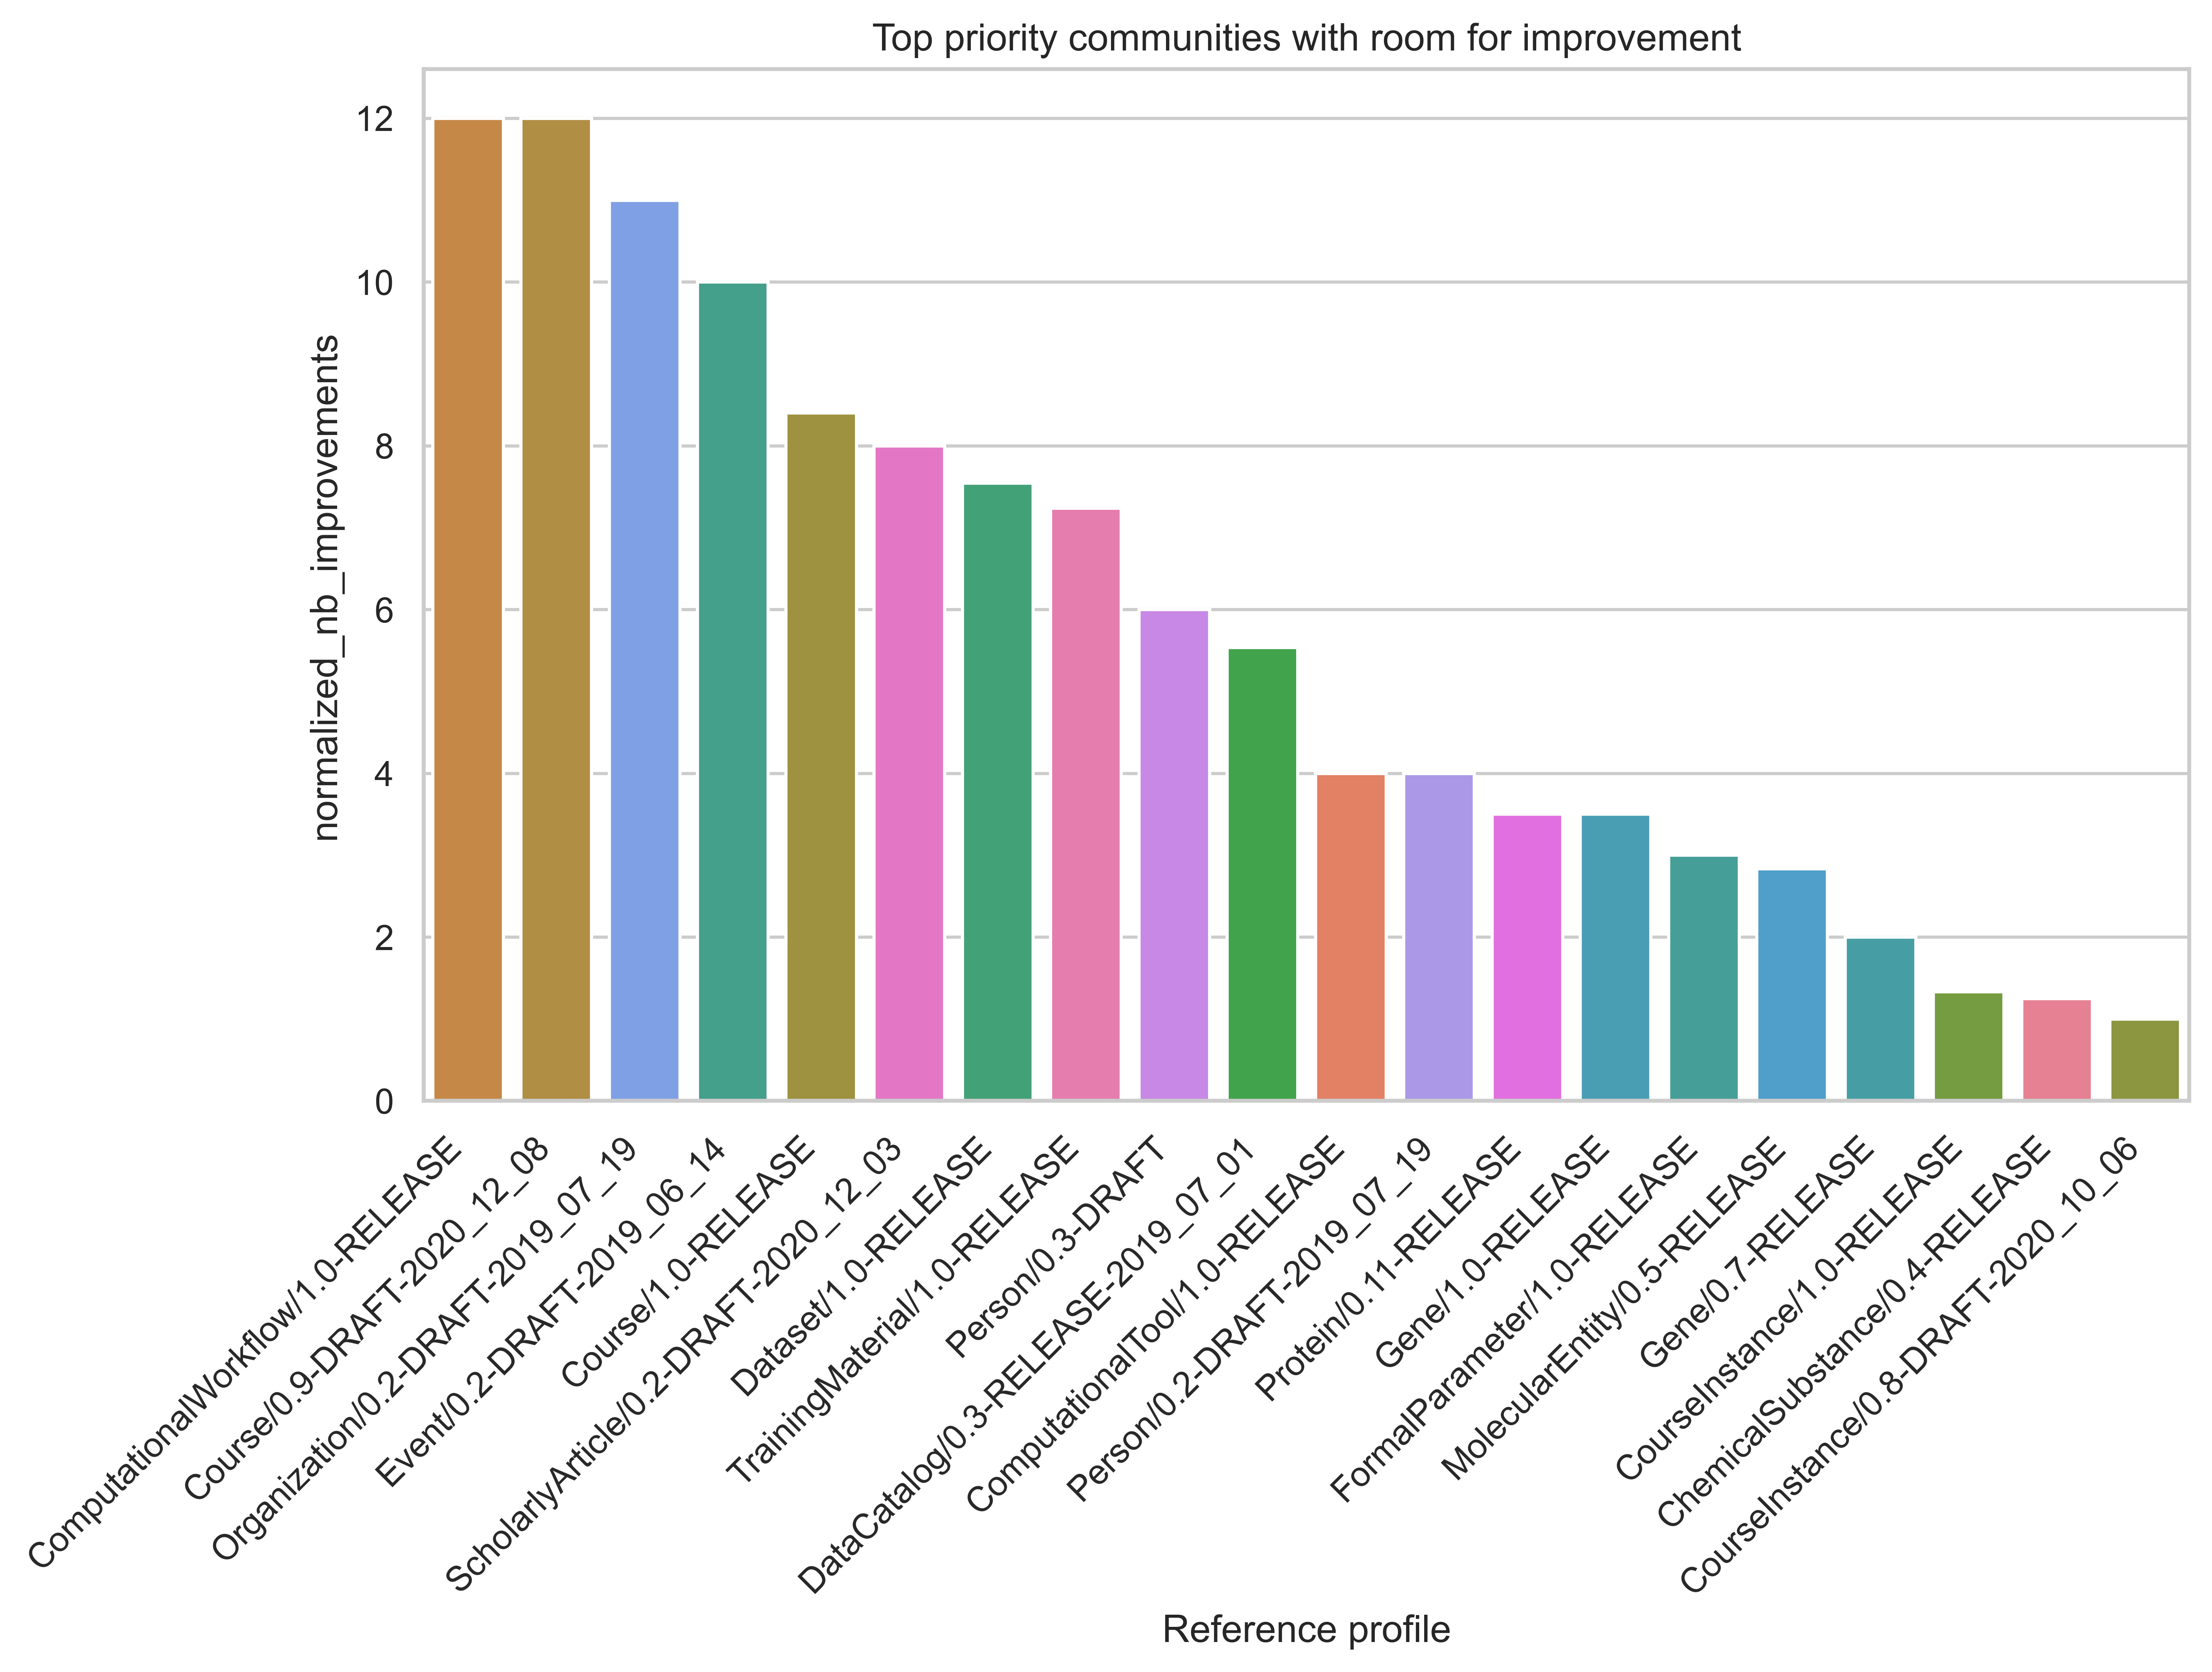

In [111]:
plt.figure(figsize=(10,6), dpi=600) 

g = sns.barplot(df_agg, 
                x="Reference profile", 
                y="normalized_nb_improvements", 
                hue="Reference profile",
                order=df_agg.sort_values('normalized_nb_improvements', ascending=False).index
               )
#g.set_xticklabels(g.get_xticklabels(), rotation=70)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set(title='Top priority communities with room for improvement')